<a href="https://colab.research.google.com/github/Francieli-Cordeiro/Francieli-Cordeiro/blob/main/desafio04DNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import pandas as pd

investimentoPlataformaWeb = pd.read_csv ("/content/MKT.csv", sep = ",")
investimentoPlataformaWeb.head(175)

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88
...,...,...,...,...
166,45.84,4.44,16.56,9.12
167,113.04,5.88,9.72,11.64
168,212.40,11.16,7.68,15.36
169,340.32,50.40,79.44,30.60


In [78]:
investimentoPlataformaWeb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [79]:
investimentoPlataformaWeb.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


In [80]:
investimentoPlataformaWeb.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


In [81]:
%pip install plotly
%pip install cufflinks
%pip install chart-studio

In [82]:
import seaborn as sns
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf

import plotly.graph_objects as go
import plotly.express as px

In [83]:
fig = px.box (investimentoPlataformaWeb, x="sales" )
fig.update_traces(line_color= "blue")

In [85]:
import seaborn as sns

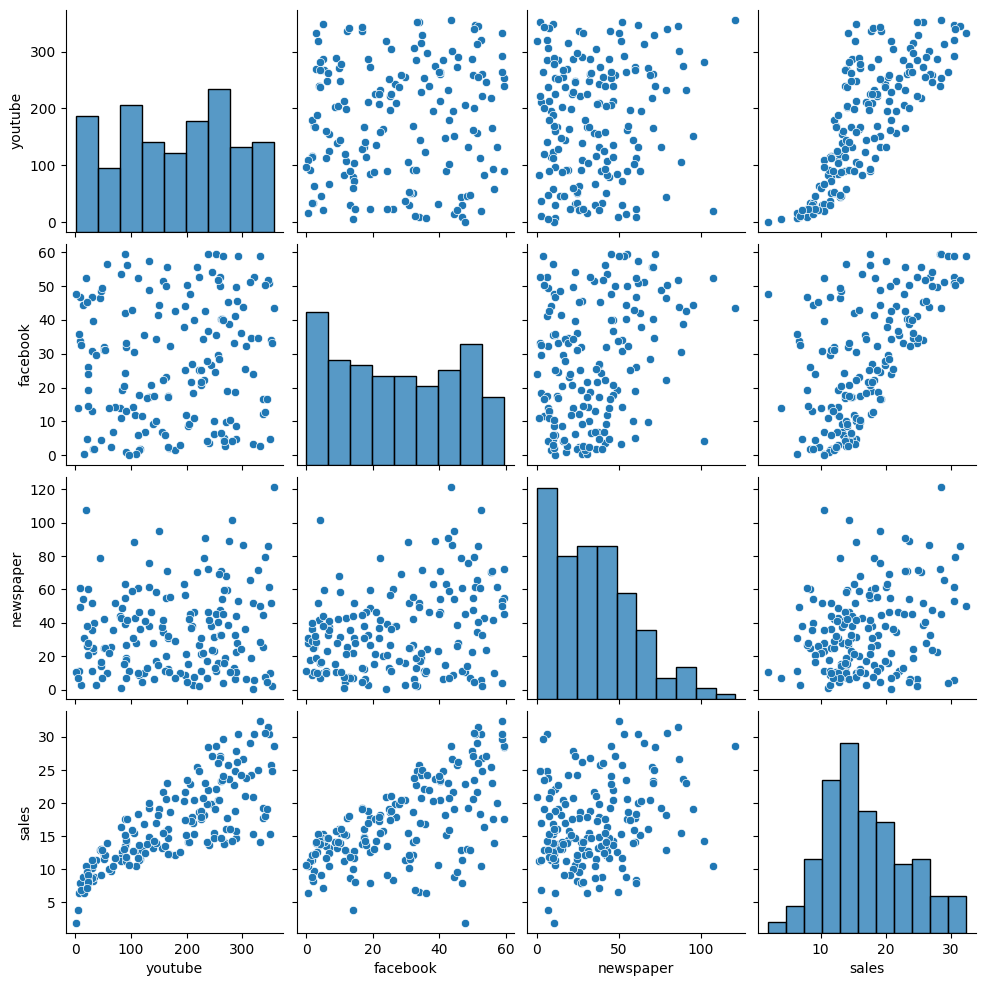

In [88]:
sns.pairplot(investimentoPlataformaWeb)

In [87]:
investimentoPlataformaWeb.columns

Index(['youtube', 'facebook', 'newspaper', 'sales'], dtype='object')

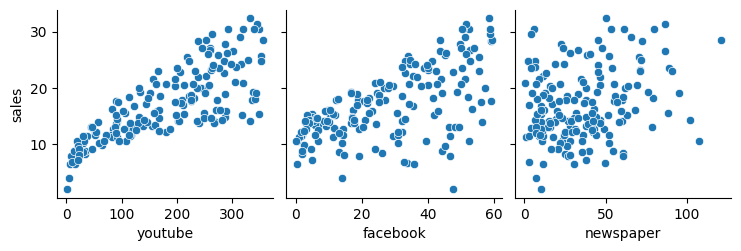

In [14]:
sns.pairplot(investimentoPlataformaWeb, x_vars=['youtube', 'facebook', 'newspaper'], y_vars= 'sales')

In [89]:
investimentoPlataformaWeb.corr()

,youtube,facebook,newspaper,sales
youtube,1.000000,0.086538,0.110759,0.782030
facebook,0.086538,1.000000,0.293425,0.602918
newspaper,0.110759,0.293425,1.000000,0.254987
sales,0.782030,0.602918,0.254987,1.000000


from matplotlib import pyplot as plt
_df_11['youtube'].plot(kind='hist', bins=20, title='youtube')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12['facebook'].plot(kind='hist', bins=20, title='facebook')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['newspaper'].plot(kind='hist', bins=20, title='newspaper')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14['sales'].plot(kind='hist', bins=20, title='sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15.plot(kind='scatter', x='youtube', y='facebook', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16.plot(kind='scatter', x='facebook', y='newspaper', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17.plot(kind='scatter', x='newspaper', y='sales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['youtube'].plot(kind='line', figsize=(8, 4), title='youtube')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['facebook'].plot(kind='line', figsize=(8, 4), title='facebook')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_20['newspaper'].plot(kind='line', figsize=(8, 4), title='newspaper')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_21['sales'].plot(kind='line', figsize=(8, 4), title='sales')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: >

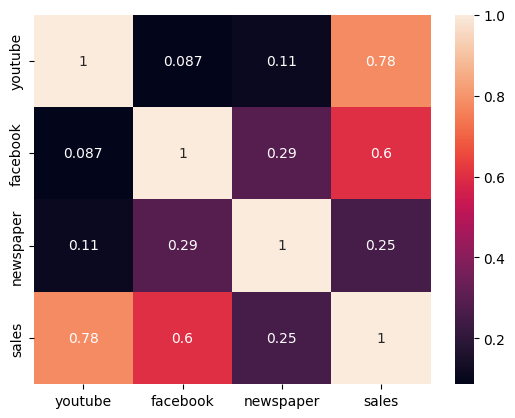

In [90]:
sns.heatmap(investimentoPlataformaWeb.corr(), annot=True)

<Axes: xlabel='sales', ylabel='Count'>

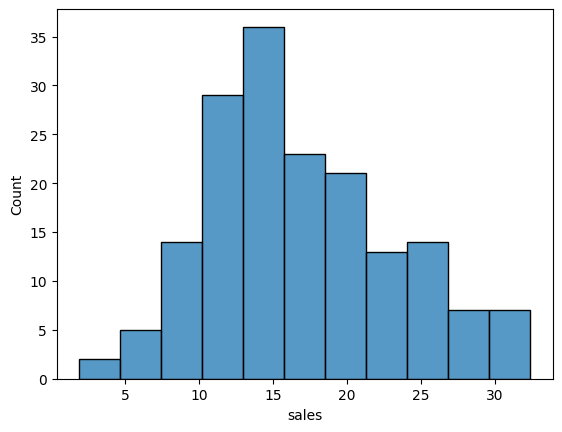

In [91]:
sns.histplot(investimentoPlataformaWeb["sales"])

In [92]:
investimentoPlataformaWeb.columns

Index(['youtube', 'facebook', 'newspaper', 'sales'], dtype='object')

In [93]:
x = investimentoPlataformaWeb[['youtube', 'facebook', 'newspaper']]
y = investimentoPlataformaWeb[['sales']]

In [94]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size= 0.7, test_size = 0.3, random_state= 42)

In [95]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)




(119, 3)
(52, 3)
(119, 1)
(52, 1)


In [96]:
from sklearn.linear_model import LinearRegression

In [97]:
lm = LinearRegression()

In [98]:
lm.fit(x_train, y_train)

LinearRegression()

In [99]:
y_pred = lm.predict(x_test)

In [100]:
from sklearn.metrics import r2_score
r = r2_score(y_test,y_pred)

In [101]:
print("r_quadrado:", r)

r_quadrado: 0.882423505618885


In [103]:
import matplotlib.pyplot as plt

ValueError: x and y must have same first dimension, but have shapes (50,) and (52, 3)

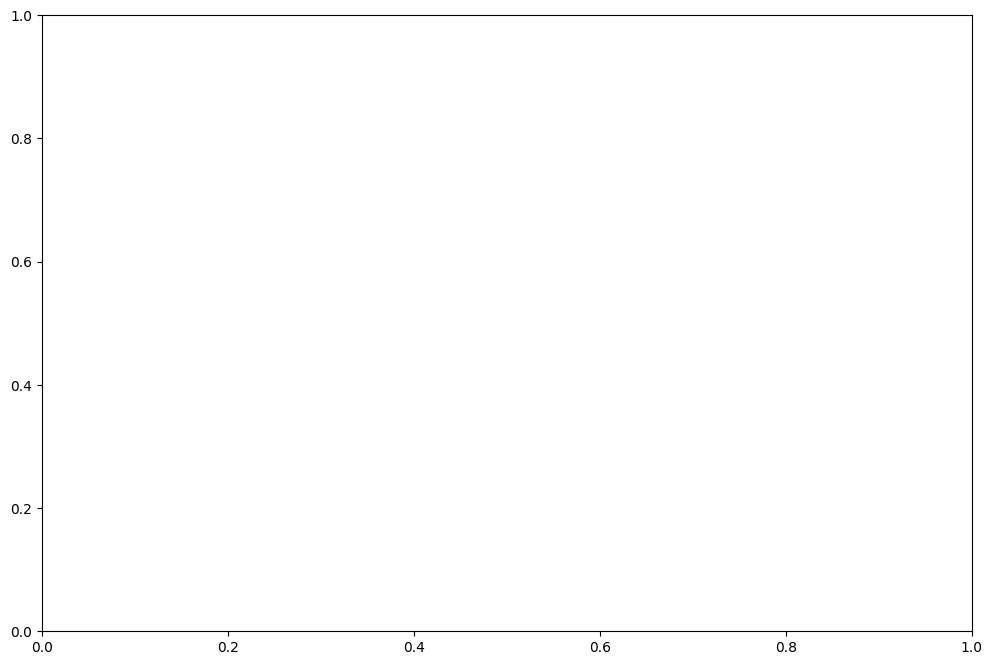

In [107]:
c = [i for i in range(1,51, 1)]
fig = plt.figure(figsize=(12,8))
plt.plot(c, x_test ,color="blue")
plt.plot(c, x_pred ,color = "red")
plt.xlabel("index")
plt.ylabel("previsao de vendas")
